# Tienda Online Ice

En esta investigación se realizará un análisis al datset de la tienda online Ice, para estudiar los datos copilados de las ventas en el 2016, con el fin de pronosticar las ventas para el 2017, y así realizar una campaña; se tendrá que analizar los patrones que tiene un videojuego para que tenga éxito,ya sea en las calificaciones que les dan, en las ventas que genera, o si tiene que ver la plataforma, la cual pertenece, etc.


Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Realizar un análisis de datos.
4. Probar las hipótesis.
5. Escribir una conclusión general

## Inicialización

In [1]:
#Cargar las librerías
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd

### Cargar los datos

In [2]:
ice_data = pd.read_csv('/datasets/games.csv')
ice_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
ice_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Se decidió observar el dataframe de la empresa, debido a que se necesita analizar las columnas, la cantidad de datos que posee, los tipos de datos que se pueden ver a simple vista, para tener un vistazo rápido de los posibles patrones que pueden existir.

### Explorar la información general.

In [4]:
ice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se puede observar que hay algunas columnas con valores ausentes, unas más que otras; por este motivo, se deberán realizar distintas acciones para lidiar con estas columnas para ciertas columnas del dataframe. Asimismo, hay algunas columnas que su tipo no concuerda con la columna en cuestión, como el año de lanzamiento o las puntuaciones; para los siguientes, como en el preprocesamiento de datos, se tendrá que resolver estos inconvenientes.

## Preprocesar los datos

In [5]:
ice_data.columns = ice_data.columns.str.lower()
ice_data.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
ice_data['year_of_release'] = ice_data['year_of_release'].astype('Int64')
ice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Se decidio cambiar el tipo de columna year_of_release de float a intenger, ya que el año no puede ser un decimal, por lo tanto se le cambio a número entero.

In [7]:
ice_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
ice_data.loc[ice_data['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [9]:
ice_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
9.6       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [68]:
ice_data['user_score'] = ice_data['user_score'].replace('tbd', 'NaN')
ice_data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [11]:
ice_data['user_score'] = ice_data['user_score'].astype('float64')
ice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [12]:
ice_imput = ice_data.dropna()
print('nro de filas originales:',ice_data.shape[0])
print('nro de filas imput:',ice_imput.shape[0])
print('% de pérdida:',(ice_imput.shape[0]/ice_data.shape[0])*100)

nro de filas originales: 16715
nro de filas imput: 6826
% de pérdida: 40.83757104397248


para la columna del puntaje del usuarios, se encontró un dato atípico, el cual era 'tbd', ya que no dejaba cambiar el tipo de columna a float para que sea más fácil trabajar con esta columna, por este motivo, se decidió reemplazar el dato tbd por el puntaje más común de la columna, el cuál era 7.8, lo que si coincide con los tipos de juego con los que está relacionado en la fila de los datos donde se encuentra este dato; asimismo, para los valores ausentes se optó por utilizar el valor mediano de los puntajes para rellenar estos datos, ya que con el valor mediano, debido a que con este valor habrá menos posibilidades de tener reslutados atípicos.

In [13]:
ice_data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [14]:
ice_data.loc[ice_data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Para esta columna critic score, se decidió reemplazar los valores ausentes con la mediana de estos datos, ya que hay valores atípicos importantes, es decir, hay gran diferencia en las cantidades de juegos con ciertas calificaciones, y este dato de la mediana se acerca al valor más típico del puntaje.

In [15]:
ice_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [16]:
ice_data.loc[ice_data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Para esta columna se decidió reemplazar los valores ausentes por la categoría E, debido a que es la categoría más común, y los juegos donde se encuentran los valores ausentes se relacionan a esta categoría.

In [17]:
ice_data.duplicated().sum()

0

Por último, se decidió eliminar los otros valores ausentes, ya que no eran muchos, y no iban a afectar a los valores en comparación a las otras columnas.

In [18]:
def get_sales(row):
    total_sales = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return total_sales

In [19]:
ice_data['total_sales'] = ice_data.apply(get_sales, axis=1)
ice_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [20]:
ice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


Al final, se añadió una nueva columna de las ventas totales por cada juego de cada región, para conocer si es un factor que determina el éxito de un videojuego.

## Analizar los datos

In [21]:
ice_year = ice_data.groupby('year_of_release')['name'].count().sort_values(ascending=False)
ice_year

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

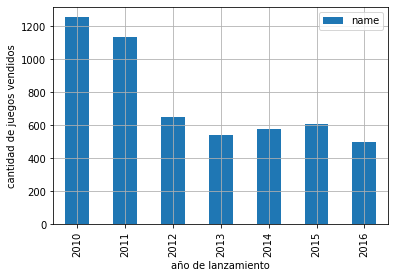

In [22]:
curreny_ice_years = ice_data.query('year_of_release > 2009')
curreny_ice_years.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True)
plt.ylabel('cantidad de juegos vendidos')
plt.xlabel('año de lanzamiento')
plt.show()

Se puede observar, que hay una diferencia significativa en la cantidad de juegos lanzados en los años posteriores al 2000 que los juegos lanzados en los años anteriores al 2000. Además, para tener un mejor vistazo a la cantidad de videojuegos vendida, se observaron los datos de los años posteriores al 2009, ya que ocurren en una época más moderna.

In [23]:
platform_sales = ice_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [24]:
high_platform_sales = platform_sales.query('total_sales > 700')
high_platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


<AxesSubplot:xlabel='year_of_release'>

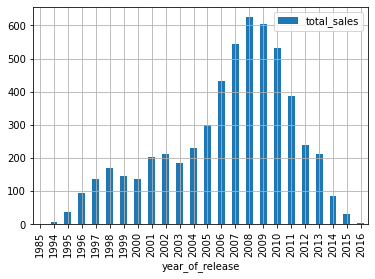

In [25]:
best_platforms = ice_data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
best_platforms.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

Se tomaron en cuenta estas 6 plataformas, ya que son de las más vendidas, además se puede observar con el gráfico que l amayoría de sus ventas ocurren en los años 2000

In [26]:
current_years = ice_data.loc[ice_data['year_of_release'] > 2000]
current_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [27]:
current_years.groupby('platform')['total_sales'].sum()

platform
3DS      257.81
DC         1.42
DS       802.76
GB         9.24
GBA      312.81
GC       196.73
N64        3.33
PC       201.06
PS        44.33
PS2     1194.39
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
WS         0.28
Wii      891.18
WiiU      82.19
X360     961.24
XB       250.58
XOne     159.32
Name: total_sales, dtype: float64

In [28]:
old_years = ice_data.loc[ice_data['year_of_release'] < 2000]
old_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16539,Grand Prix Legends,PC,1997,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E,0.01
16607,Samurai Shodown: Warrios Rage,PS,1999,Fighting,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16666,Psychic Detective,PS,1995,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01


In [29]:
old_years.groupby('platform')['total_sales'].sum()

platform
2600     86.48
3DO       0.10
DC        8.54
DS        0.02
GB      225.43
GEN      30.77
GG        0.04
N64     180.71
NES     251.05
NG        1.44
PC       50.04
PCFX      0.03
PS      586.88
SAT      33.59
SCD       1.86
SNES    200.04
TG16      0.16
WS        0.46
Name: total_sales, dtype: float64

In [30]:
nes = ice_data.loc[ice_data['platform'] == 'NES']
nes.groupby('year_of_release')['total_sales'].sum()

year_of_release
1983    10.96
1984    50.08
1985    53.44
1986    36.41
1987    19.76
1988    45.01
1989     7.85
1990    15.73
1991     6.11
1992     1.98
1993     3.61
1994     0.11
Name: total_sales, dtype: float64

In [31]:
ps2 = ice_data.loc[ice_data['platform'] == 'PS2']
ps2.groupby('year_of_release')['total_sales'].sum()

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

In [32]:
last_years = ice_data.query('year_of_release > 2013')
last_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

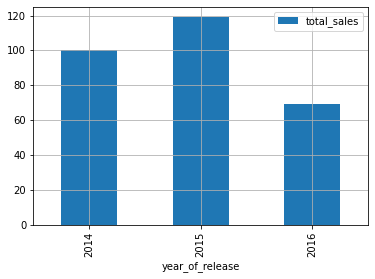

In [33]:
last_years.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

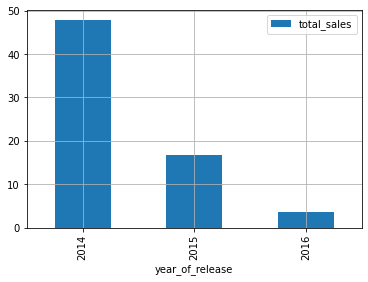

In [34]:
last_years.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

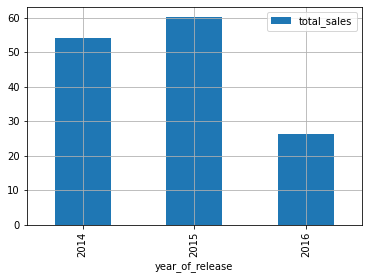

In [35]:
last_years.query('platform == "XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

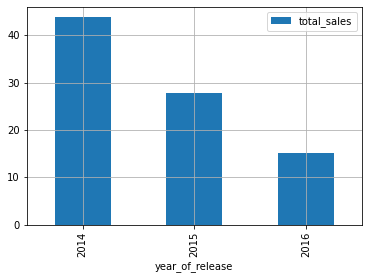

In [36]:
last_years.query('platform == "3DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year_of_release'>

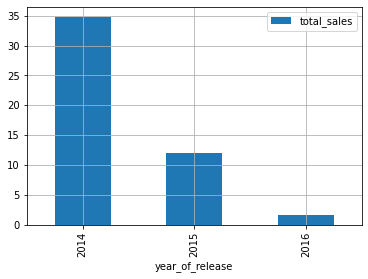

In [37]:
last_years.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True)

Se escogieron dos plataformas para  determinar aproximadamente cuanto demora una plataforma en aparecer o en desaparecer; se tomó en cuenta la plataforma NES, ya que fue una de las máspopulares y vendidas de su época(1983-1994), observando que le tomó 11 años para ya no ser más popular. Asimismo, se tomó en cuenta la plataforma PS2, ya que es la más vendida y una de las más populares de la época moderna, y se pudo observar que le tomó alrededor de 4 años desde su primer lanzamiento para poder consolidarse como una de las más populares; sin embargo, desde el 2011 dejó de ser relevante.

Por otro lado, se analizaron las ventas de las plataformas en los últimos 3 años, y se pudo observar que las plataformas de última generación como el PS4 y Xone tiene una tendencia de crecimiento, ya que desde su lanzamiento sus ventas han crecido, y para el próximo año 2017 pueden seguir creciendo.

Para continuar con la investigación, se debe considerar el periodo del 2001 para adelante, ya que es el período donde más ocurren los lanzamientos y las ventas.

In [38]:
good_ice_data = ice_data.query('year_of_release > 2000')
good_ice_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [39]:
print(good_ice_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False))
print()
print(ice_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS2     1194.39
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.81
PSP      289.53
3DS      257.81
XB       250.58
PC       201.06
GC       196.73
XOne     159.32
WiiU      82.19
PSV       53.81
PS        44.33
GB         9.24
N64        3.33
DC         1.42
WS         0.28
Name: total_sales, dtype: float64

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


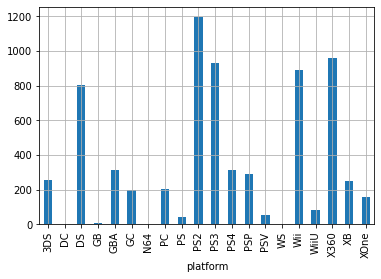

In [40]:
print(good_ice_data.groupby('platform')['total_sales'].sum().plot(kind='bar', grid=True))


AxesSubplot(0.125,0.125;0.775x0.755)


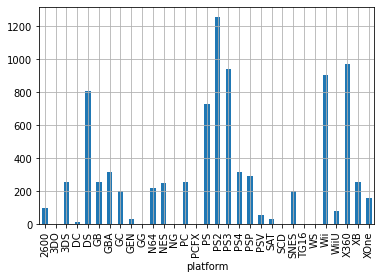

In [41]:
print(ice_data.groupby('platform')['total_sales'].sum().plot(kind='bar', grid=True))

Se puede apreciar que plataformas como el PS2 se manteniene líder en este nuevo rango de años; sin embargo, se pudo apreciar que a partir del 2008, las ventas empezaron a bajar hasta el 2011. La plataforma DS sube de posición como de las más vendidas, y el N64, la PC y el GB, reducen sus ventas. Por este motivo, las plataformas más rentables serían el PS2, X360, PS3, Wii, y DS; ya que sus ventas totales superan los 800 soles; por ende son líderes de venta en esos años hasta el 2016.

Sin embargo, en los últimos 3 años las plataformas más vendidas fueron el PS4, PS3, XONE, X360 y 3DS. Por este motivo, para realizar una proyección para el 2017, se analizarán estos datos. 

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count   376.000000
mean      0.766356
std       1.614969
min       0.010000
25%       0.057500
50%       0.185000
75%       0.690000
max      14.630000


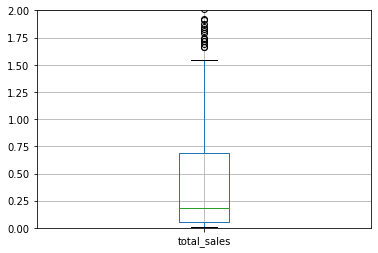

In [42]:
PS4 = last_years.query('platform == "PS4"')
PS4_games = PS4.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 2)
print(PS4_games.boxplot())
print(PS4_games.describe())

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count   228.000000
mean      0.615614
std       1.046513
min       0.010000
25%       0.050000
50%       0.205000
75%       0.632500
max       7.390000


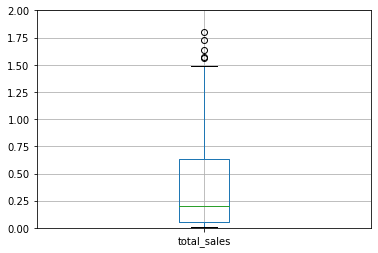

In [43]:
xone = last_years.query('platform == "XOne"')
xone_games = xone.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 2)
print(xone_games.boxplot())
print(xone_games.describe())

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count   111.000000
mean      0.434414
std       0.628967
min       0.010000
25%       0.070000
50%       0.180000
75%       0.505000
max       4.280000


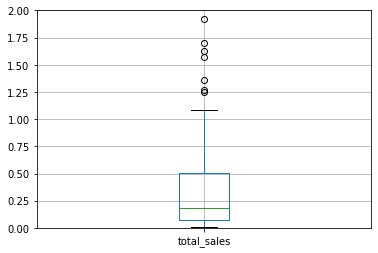

In [44]:
X360 = last_years.query('platform == "X360"')
X360_games = X360.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 2)
print(X360_games.boxplot())
print(X360_games.describe())

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count   219.000000
mean      0.311324
std       0.633059
min       0.010000
25%       0.040000
50%       0.110000
75%       0.325000
max       5.270000


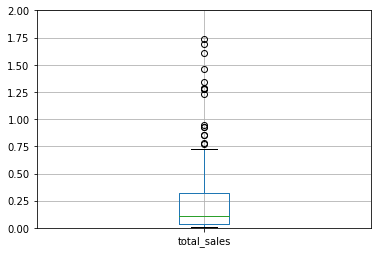

In [45]:
PS3 = last_years.query('platform == "PS3"')
PS3_games = PS3.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 2)
print(PS3_games.boxplot())
print(PS3_games.describe())

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count  1286.000000
mean      0.692986
std       3.165022
min       0.010000
25%       0.090000
50%       0.190000
75%       0.487500
max      82.540000


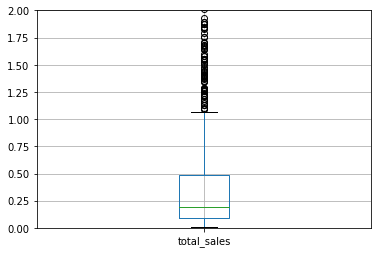

In [46]:
Wii = good_ice_data.query('platform == "Wii"')
Wii_games = Wii.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 2)
print(Wii_games.boxplot())
print(Wii_games.describe())

AxesSubplot(0.125,0.125;0.775x0.755)
       total_sales
count   212.000000
mean      0.408868
std       1.188368
min       0.010000
25%       0.030000
50%       0.090000
75%       0.250000
max      11.680000


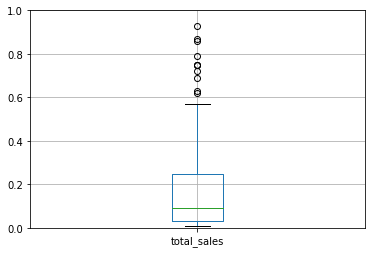

In [47]:
x3DS = last_years.query('platform == "3DS"')
x3DS_games = x3DS.groupby('name')['total_sales'].sum().reset_index()
plt.ylim(0, 1)
print(x3DS_games.boxplot())
print(x3DS_games.describe())

Se puede apreciar que las ventas promedio de los videojuegos de estas plataformas, no llegan al millón, este es un punto que tienen estas plataformas en común, además se puede observar en los gráficos, que muchos tienen diferencias significativas en sus ganancias, ya que se aprecian datos fuera de los límites del diagrama; es decir, mientras algunos juegos tiene ventas totales de 115000 dólares otros juegos logran llegar a los 20 millones de dólares de ganancia; siendo una gran diferencia.

In [48]:
PS4['critic_score'].corr(PS4['total_sales'])


0.40266141068104083

In [49]:
PS4['user_score'].corr(PS4['total_sales'])


-0.040131589472697356

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

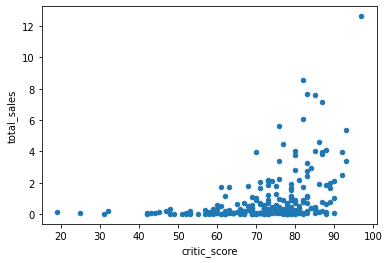

In [50]:
PS4.plot(x='critic_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

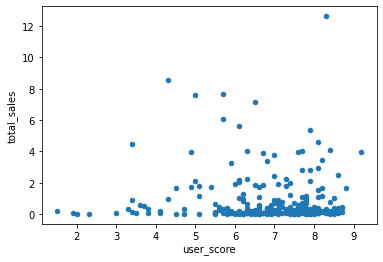

In [51]:
PS4.plot(x='user_score', y='total_sales', kind='scatter')

Se puede observar que existe una correlación directa entre las reseñas del ps2 y las ventas totales del mismo, es decir, mientras una aumenta la otra también aumentará, ya que su correlación es positiva, y cercana al 1, volviendolas muy dependientes a la otra. Además, en los gráficos se puede observar que hay mayor concentración en puntajes altos, y son en esos puntajes donde también más se concentran en las ganancias más elevadas, se podría decir que, los puntajes más altos poseen las mayores ganancias. 

              total_sales
genre                    
Action             199.36
Adventure           17.55
Fighting            28.22
Misc                37.55
Platform            18.09
Puzzle               2.21
Racing              27.52
Role-Playing       101.44
Shooter            170.94
Simulation          13.13
Sports             109.48
Strategy             3.96

AxesSubplot(0.125,0.125;0.775x0.755)


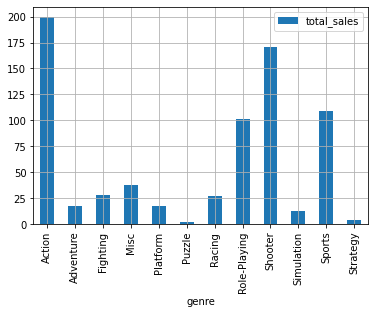

In [52]:
print(last_years.pivot_table(index='genre', values='total_sales', aggfunc='sum'))
print()
print(last_years.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True))

Se puede confirmar que son los géneros de acción, deportes y shooter, los que poseen mayores ganacias en comparación al resto, y superandolos con una diferencia notable, ya que sus ganancias superan los 900 millones de dólares, y el resto es inferior a los 750 millones de dólares.

In [53]:
last_years.groupby('platform')['critic_score'].mean().sort_values(ascending=False)

platform
PC      76.215517
XOne    73.793548
PSV     72.259259
PS4     72.164557
WiiU    71.186047
3DS     68.980392
PS3     66.555556
X360    63.730769
PSP           NaN
Wii           NaN
Name: critic_score, dtype: float64

In [54]:
last_years.groupby('platform')['user_score'].mean().sort_values(ascending=False)

platform
PSV     7.656164
3DS     7.138182
WiiU    7.087500
PS4     6.828099
XOne    6.594545
Wii     6.350000
PC      6.298361
PS3     6.014286
X360    5.771084
PSP          NaN
Name: user_score, dtype: float64

Se analizó las plataformas con mayor y mejor promedio en las calificaciones de usuario y críticos durante esos años.

## Crear un perfil de usuarios

In [55]:
NA = last_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(NA)
print()
EU = last_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(EU)
print()
JP = last_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(JP)
print()
other = last_years.groupby('platform')['other_sales'].sum().sort_values(ascending=False).reset_index()
print(other)

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05
5     WiiU     19.36
6       PC      7.23
7      PSV      2.52
8      Wii      2.08
9      PSP      0.00

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12
5     X360     15.49
6     WiiU     13.15
7      PSV      3.53
8      Wii      2.59
9      PSP      0.00

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31
5      PSP      0.36
6     XOne      0.32
7     X360      0.08
8       PC      0.00
9      Wii      0.00

  platform  other_sales
0      PS4        44.48
1     XOne        12.52
2      PS3         9.37
3     X360         4.35
4      3DS         3.68
5     WiiU         3.16
6       PC         1.85
7      PSV         1.81
8      Wii         0.40
9      PSP         0.00


In [56]:
NA_tp = NA[:5].pivot_table(columns='platform', values='na_sales')
EU_tp = EU[:5].pivot_table(columns='platform', values='eu_sales')
JP_tp = JP[:5].pivot_table(columns='platform', values='jp_sales')
other_tp = other[:5].pivot_table(columns='platform', values='other_sales')
print(NA_tp)
print()
print(EU_tp)
print()
print(JP_tp)
print()
print(other_tp)

platform    3DS    PS3    PS4  X360   XOne
na_sales  22.64  22.05  98.61  28.3  81.27

platform    3DS     PC    PS3     PS4   XOne
eu_sales  16.12  17.97  25.54  130.04  46.25

platform    3DS    PS3    PS4    PSV  WiiU
jp_sales  44.24  11.22  15.02  14.54  7.31

platform      3DS   PS3    PS4  X360   XOne
other_sales  3.68  9.37  44.48  4.35  12.52


In [57]:
TP = NA_tp.merge(EU_tp, on=['3DS', 'PS3', 'PS4','XOne'], how='outer')
TP = TP.merge(JP_tp, on=['3DS', 'PS3', 'PS4'], how='outer')
TP = TP.merge(other_tp, on=['3DS','PS3','PS4','X360','XOne'], how='outer')
TP

platform,3DS,PS3,PS4,X360,XOne,PC,PSV,WiiU
0,22.64,22.05,98.61,28.30,81.27,NaN,NaN,NaN
1,16.12,25.54,130.04,NaN,46.25,17.97,NaN,NaN
2,44.24,11.22,15.02,NaN,NaN,NaN,14.54,7.31
3,3.68,9.37,44.48,4.35,12.52,NaN,NaN,NaN


In [58]:
top_platforms_3DS = TP['3DS']
x3DS_variance = np.var(top_platforms_3DS)
x3DS_variance

216.1971000000001

In [59]:
top_platforms_ps3 = TP['PS3']
ps3_variance = np.var(top_platforms_ps3)
ps3_variance

47.512825000000404

In [60]:
top_platforms_ps4 = TP['PS4']
ps4_variance = np.var(top_platforms_ps4)
ps4_variance

2020.1997187500058

Después de observar las 5 plataformas más vendidas en cada región, en los últimos 3 años, se pudo concluir que en total son 7 que más destacan en total en todas estas regiones, muchas repitiendose en más de dos regiones. Sin embargo, se tomó en cuenta 3 plataformas, las cuales son las que tienen relevancia y estan entre las 5 primeras en las 4 regiones; el PS3, PS4 y 3DS, ya que hay otras que en una región tienen más relevancia que en otra; se pudo observar que es el ps4 que tiene más variación en sus ventas totales, esto se puede deber a que en la mayoría de las regiones es la plataforma que más genera.

In [61]:
NA_genre = last_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(NA_genre)
print()
EU_genre = last_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(EU_genre)
print()
JP_genre = last_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(JP_genre)
print()
other_genre = last_years.groupby('genre')['other_sales'].sum().sort_values(ascending=False).reset_index()
print(other_genre)

           genre  na_sales
0        Shooter     79.02
1         Action     72.53
2         Sports     46.13
3   Role-Playing     33.47
4           Misc     15.05
5       Fighting     12.43
6         Racing      8.74
7       Platform      6.79
8      Adventure      5.64
9     Simulation      2.63
10      Strategy      0.98
11        Puzzle      0.65

           genre  eu_sales
0         Action     74.68
1        Shooter     65.52
2         Sports     45.73
3   Role-Playing     28.17
4         Racing     14.13
5           Misc     12.86
6     Simulation      7.30
7       Platform      6.80
8       Fighting      6.69
9      Adventure      6.49
10      Strategy      1.79
11        Puzzle      0.52

           genre  jp_sales
0   Role-Playing     31.16
1         Action     29.58
2       Fighting      6.37
3           Misc      5.61
4        Shooter      4.87
5      Adventure      3.60
6         Sports      3.26
7       Platform      2.69
8     Simulation      2.31
9         Racing      1.76

Los géneros principales de videojuegos en las distintas regiones, son de acción, deportes, shooter, multiplayer y role play. En las regiones de Estados Unidos, Europa y en las otras regiones, se repite el mismo patron siendo el género de acción el más vendido, junto a deportes, shooter, multiplayer, y añadiendose el género de carreras. Sin embargo, en Japón, esto cambia, siendo el role play el género más vendido, y sumandose en el top el género de plataformas.

In [62]:
NA_rating = last_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
print(NA_rating)
print()
EU_rating = last_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
print(EU_rating)
print()
JP_rating = last_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
print(JP_rating)
print()
other_rating = last_years.groupby('rating')['other_sales'].sum().sort_values(ascending=False).reset_index()
print(other_rating)

  rating  na_sales
0      M     96.42
1      E     50.74
2      T     38.95
3   E10+     33.23

  rating  eu_sales
0      M     93.44
1      E     58.06
2      T     34.07
3   E10+     26.16

  rating  jp_sales
0      T     14.78
1      E      8.94
2      M      8.01
3   E10+      4.46

  rating  other_sales
0      M        28.67
1      E        15.39
2      T        11.33
3   E10+         7.83


Los juegos con clasificación M son los que más ganacias generan en la mayoría de las regiones.

## Verificar las hipótesis

En esta parte del proyecto, se buscará probar las siguientes hipótesis:

- Que las calificaciones promedio de los usuarios para las plataformas XBOX ONE y PC son las mismas
- Que las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.

Esto se realizará a través de un criterio de verificación de hipótesis.

H.N = Las calificaciones promedio de los usuarios para las plataformas XBOX ONE y PC no son las mismas.

H.A = Las calificaciones promedio de los usuarios para las plataformas XBOX ONE y PC son las mismas.

In [65]:
ice_xboxone = last_years.query('platform == "XOne"')
ice_pc =  last_years.query('platform == "PC"')
xboxone_uc = ice_xboxone['user_score']
pc_uc = ice_pc['user_score']
alpha = 0.05
results = st.ttest_ind(xboxone_uc, pc_uc)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: nan
No rechazamos la hipótesis nula


H.N = Las calificaciones promedio de los usuarios para los géneros de acción y deportes no son diferentes.

H.A = Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes.

In [66]:
ice_action = last_years.query('genre == "Action"')
ice_sports =  last_years.query('genre == "Sports"')
action_uc = ice_action['user_score']
sports_uc = ice_sports['user_score']
alpha = 0.05
results = st.ttest_ind(action_uc, sports_uc)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: nan
No rechazamos la hipótesis nula


Para poder verificar las hipótesis en ambos casos, se decidió realizar la prueba de hipótesis sobre la igualdad de dos medias de dos poblaciones, ya que se estaban utilizan dos datasets de dos poblaciones estadísticas diferentes, estableciendo un valor de significancia(alpha) del 5%; aunque todo provenga de uno mismo pero más grande, para comparar en este caso los ingresos promedios. Resultando en ambos casos, que se rechace la hipótesis nula, es decir, que no hay gran diferencia en las calificaciones promedio de los usuarios.

## Conclusión general

Después de analizar el dataset se pudo concluir lo siguiente:


1. Primero, se decidió analizar la información del datset, la cantidad de columnas, las filas, la cantidad de datos, los tipos de columnas, etc.
2. Se encontraron valores ausentes en algunas columnas del dataframe, como la de user_score, critic_score, y otras más. Esto pudo ocurrir debido a factores que pueden influenciar estos datos como un error cuando se recuperaron los datos de los juegos, no existen datos de las calificaciones, nombres o el año de lanzamiento; o por errores de digitación. Sin embargo, se decidió trabajar con estos valores ausentes, ya que con estos se podrían encontrar información relevante, y si los reemplazabamos o eliminábamos podría afectar a la investigación.
3. No se encontraron datos duplicados.
4. Se tuvo que añadir una nueva columna 'total_sales' para las ventas totales en cada región, debido a que se debe conocer lo que cada juego genera por región en millones de dólares, a través de una operación matemática de la suma de las ganancias en cada región por juego.

Asimismo, se comprobó lo siguiente:

1. Las calificaciones promedio por usuario para las plataformas xbox one y pc no son las mismas, es decir ambas generan el mismo impacto en los usuarios, esto se realizó a través de la verificación de las hipótesis nulas y alternativas; siendo la nula que no son las mismas; es decir la contradicción de la hipótesis; y la alternativa que sí son las mismas.
2. Las calificaciones promedio por usuario para los géneros de acción y deporte sí son las mismas, es decir ambas generan el mismo impacto en los usuarios, esto se realizó a través de la verificación de las hipótesis nulas y alternativas; siendo la nula que no son diferentes; es decir la contradicción de la hipótesis; y la alternativa que sí son diferentes.
3. Con respecto al comportamiento de los clientes con las compras de videojuegos y plataformas en las regiones en los años desde el 2014 hasta el 2016; se decidió tomar este rango, ya que se desea hacer una proyección para el próximo año para realizar una campaña, y con este rango se pudo observar mejor a las plataformas más modernas con videojuegos más vendidos; se pudo concluir que la plataforma ps2 es la que más ha vendido, con calificaciones en sus juegos media alta con los usuarios, pero no tan altas con los críticos; Sin embargo, desde el 2011, no genera una venta. Asimismo, plataformas como la ps3, wii, x360, ds; también tienen buena presencia y aceptación entre los usuarios.
4. Por último, se pudo concluir que aunque no generan las mismas cantidades de ventas como las otras, plataformas como la DC, ps4, PC y Xone, tienen buena aceptación en las calificaciones promedio de los usuarios y críticos.

Después de analizar los datos, se puede concluir que para el próximo año se debería enfocar en plataformas de última generación como el ps4, xone, etc. Ya que, son de las más exitosas en el mercado en los últimos 3 años.